<a href="https://colab.research.google.com/github/peace-adamu/Kyhosis-Prediction-System/blob/main/aspect_extraction_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **ASPECT EXTRACTION PROJECT WITH NOISE PRUNNING AND WEIGHTING**

---



**Import Neccesary Libraries and packagies**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
!pip install imbalanced-learn
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MultiLabelBinarizer

In [5]:
df=pd.read_csv('/aspect_sentence.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [3]:
df=pd.read_csv("/kaggle/input/aspect-reviews-csv/aspect_sentence.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/aspect-reviews-csv/aspect_sentence.csv'

**BASIC DATA EXPLORATION AND DATA WRANGLING**

In [6]:
df["domain"].nunique()

7

In [7]:
# df["aspects"].value_counts()

In [8]:
# Count the number of rows for each domain
domain_counts = df['domain'].value_counts()

# Print the number of rows for each domain
print(domain_counts)

# If you want to convert it to a DataFrame for better visualization or further processing
domain_counts_df = domain_counts.reset_index()
domain_counts_df.columns = ['Domain', 'Count']

# Print the DataFrame
print(domain_counts_df)


domain
restaurants    1982
creative       1577
laptops        1456
apex            653
canon           569
nokia           502
nikon           329
Name: count, dtype: int64
        Domain  Count
0  restaurants   1982
1     creative   1577
2      laptops   1456
3         apex    653
4        canon    569
5        nokia    502
6        nikon    329


In [9]:
domains_to_drop = ['restaurants', 'creative']
filtered_df = df[~df['domain'].isin(domains_to_drop)]

# Reduce the Laptop domain
laptop_df = filtered_df[filtered_df['domain'] == 'laptops']
other_domains_df = filtered_df[filtered_df['domain'] != 'laptops']

# Randomly sample rows from the laptop domain to reduce its size
sampled_laptop_df = laptop_df.sample(n=500, random_state=42)  # Adjust n as needed to balance

# Combine back the dataframes
balanced_df = pd.concat([other_domains_df, sampled_laptop_df])

# Decide whether to keep Nikon or Canon
# Here, we keep Canon and drop Nikon
# balanced_df = balanced_df[balanced_df['domain'] != 'nikon']

# Now, balanced_df should be more balanced
print(balanced_df['domain'].value_counts())




domain
apex       653
canon      569
nokia      502
laptops    500
nikon      329
Name: count, dtype: int64


In [10]:
len(balanced_df)

2553

In [11]:
!pip install nltk
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [12]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Initialize stopwords
stop_words = set(stopwords.words('english'))

# Function to clean text
def clean_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)

    # Tokenize text
    words = word_tokenize(text)

    # Remove stopwords and single/double character words
    words = [word for word in words if word not in stop_words and len(word) > 2]

    # Join words back into a single string
    cleaned_text = ' '.join(words)

    return cleaned_text

# Apply the cleaning function to the aspect and sentence columns
balanced_df['cleaned_aspects'] = balanced_df['aspects'].apply(clean_text)
balanced_df['cleaned_sentence'] = balanced_df['sentence'].apply(clean_text)

# Save cleaned data to a new CSV (optional)
balanced_df.to_csv('cleaned_dataset.csv', index=False)

# Display the first few rows of the cleaned dataset
print(balanced_df.head())

      Unnamed: 0 domain                                           sentence  \
3438        3438   apex  repost from january 13  2004 with a better fit...   
3439        3439   apex  does your apex dvd player only play dvd audio ...   
3440        3440   apex  or does it play audio and video but scrolling ...   
3441        3441   apex  before you try to return the player or waste h...   
3442        3442   apex                                       no picture :   

                                                aspects  \
3438        ['repost', 'january', 'a better fit title']   
3439     ['your apex dvd player', 'dvd audio', 'video']   
3440                           ['it', 'audio', 'video']   
3441  ['you', 'the player or waste hours', 'apex tec...   
3442                                     ['no picture']   

                                        cleaned_aspects  \
3438                    repost january better fit title   
3439                    apex dvd player dvd audio video   

In [13]:
balanced_df = balanced_df.drop(["aspects","sentence"],axis=1)

In [14]:
balanced_df.shape

(2553, 4)

In [15]:
balanced_df.sample(10)

,Unnamed: 0,domain,cleaned_aspects,cleaned_sentence
6344,6344,nikon,lumix,anyway ended purchasing lumix
6773,6773,nokia,lot wallpapers polyphonic sweet tunes,comes equipped lot wallpapers polyphonic sweet...
2526,2526,laptops,touch pad real touch pad,touch pad fine real touch pad
6410,6410,nikon,months,using months
3552,3552,apex,february march,one stopped working february march
3542,3542,apex,lot discs,play lot discs
6438,6438,nikon,,get better nikon 4300
6416,6416,nikon,16mb flash card,comes 16mb flash card need upgrade
4425,4425,canon,,cheaply made
3971,3971,apex,plane expensive addition recycling bin,travelled internationally want haul back plane...


**Aspect Distribution count**

In [16]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

# Count the occurrences of each aspect
aspect_counts = Counter(balanced_df['cleaned_aspects'].explode())

# Display the most common aspects
print(aspect_counts.most_common())

# Plot the distribution of aspects
common_aspects = aspect_counts.most_common(10)  # Adjust the number of aspects to disp

[('', 127), ('camera', 21), ('phone', 9), ('battery life', 8), ('battery', 6), ('dvd player', 5), ('time', 5), ('first digital camera', 5), ('features', 4), ('money', 4), ('amazon', 4), ('canon', 4), ('picture', 3), ('apex', 3), ('player', 3), ('dvd', 3), ('problem', 3), ('everything', 3), ('quality', 3), ('images', 3), ('radio', 3), ('another one', 2), ('video', 2), ('first dvd player', 2), ('mistake', 2), ('dvds', 2), ('week', 2), ('unit', 2), ('nothing', 2), ('price', 2), ('one', 2), ('format', 2), ('research', 2), ('negatives', 2), ('great camera', 2), ('manual', 2), ('camera features', 2), ('moment', 2), ('everything camera', 2), ('reason', 2), ('nikon coolpix', 2), ('nokia', 2), ('tmobile service', 2), ('hours', 2), ('tzones', 2), ('tmobile', 2), ('vibration', 2), ('battery life phone', 2), ('size pocket', 2), ('great features', 2), ('voice', 2), ('best phone', 2), ('service tmobile', 2), ('motherboard', 2), ('warranty', 2), ('screen', 2), ('graphics', 2), ('repost january better

**Wordcloud function for Data Analysis**

In [17]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def generate_wordcloud(domain_df, domain_name):
    all_aspects = []
    for aspects in domain_df['aspects']:
        aspects_list = eval(aspects)
        all_aspects.extend(aspects_list)

    aspect_text = ' '.join(all_aspects)

    wordcloud = WordCloud(width=800, height=400, background_color='black').generate(aspect_text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Domain: {domain_name}')
    plt.show()

**Aspects cloud showing aspects for "NOKIA" Domain**

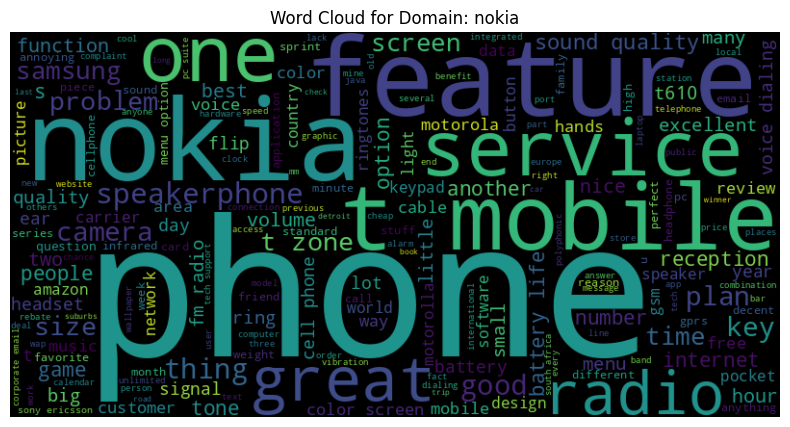

In [18]:
# Filter data for domain 'nokia'
nokia_df = df[df['domain'] == 'nokia']

# Generate word cloud for 'nokia' domain
generate_wordcloud(nokia_df, 'nokia')



**Aspects cloud showing aspects for "RESTAURANT" Domain**

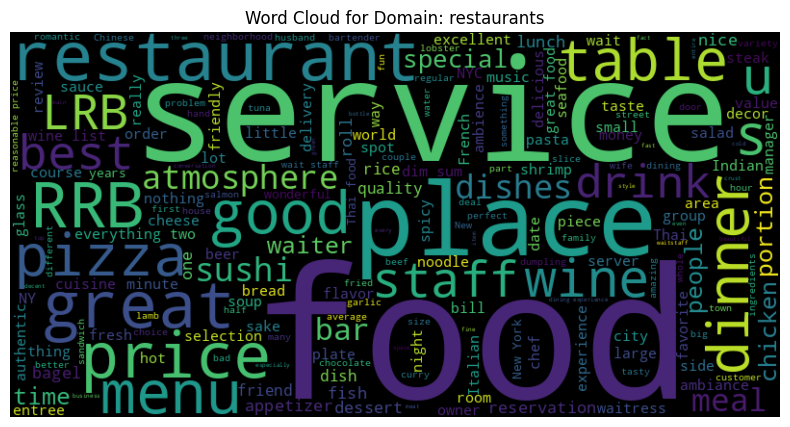

In [19]:
# Filter data for domain 'restaurants'
restaurants_df = df[df['domain'] == 'restaurants']
generate_wordcloud(restaurants_df, 'restaurants')

**Aspects cloud showing aspects for "LAPTOPS" Domain**

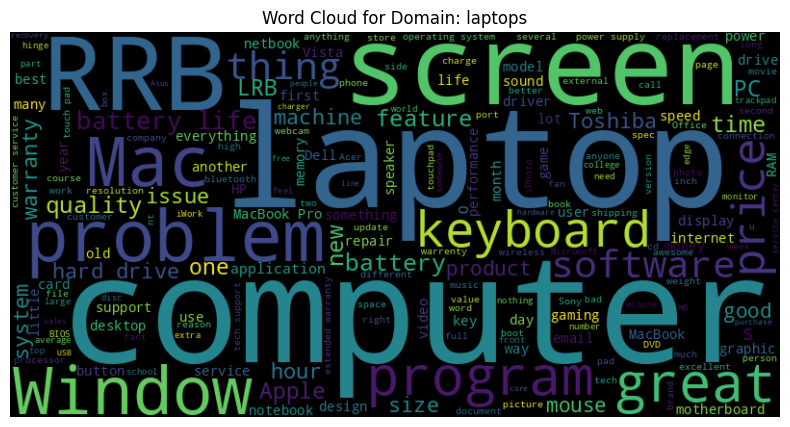

In [20]:
# Filter data for domain 'laptops'
laptops_df = df[df['domain'] == 'laptops']
generate_wordcloud(laptops_df, 'laptops')

**Aspects cloud showing aspects for "APEX" Domain**

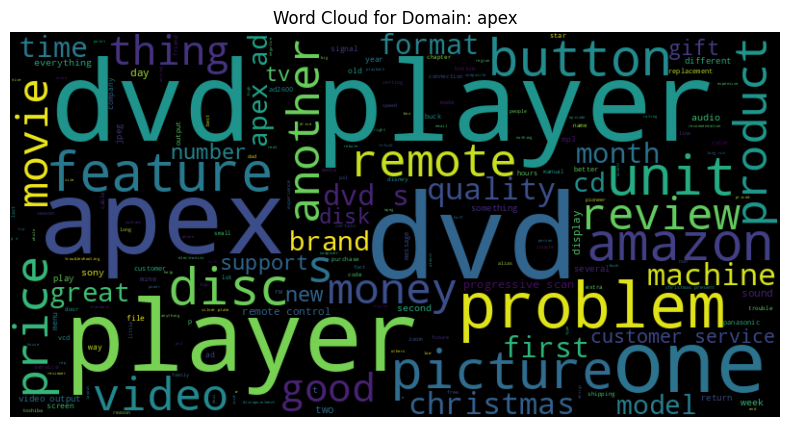

In [21]:
# Filter data for domain 'apex'
apex_df = df[df['domain'] == 'apex']
generate_wordcloud(apex_df, 'apex')

**Aspects cloud showing aspects for "CANON" Domain**

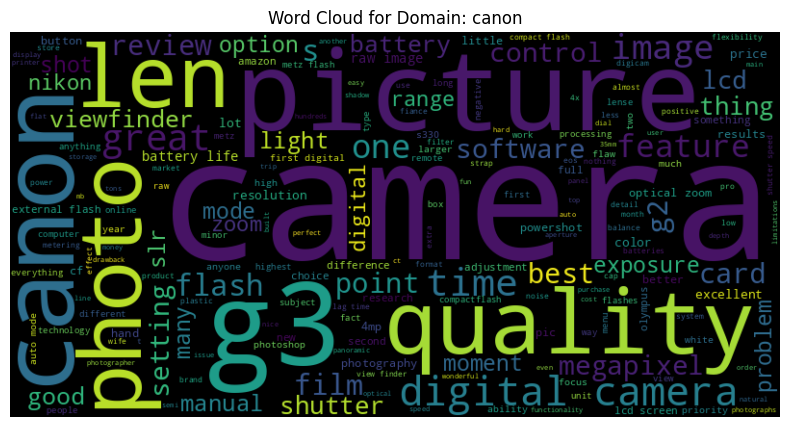

In [22]:
# Filter data for domain 'canon'
canon_df = df[df['domain'] == 'canon']
generate_wordcloud(canon_df, 'canon')

In [23]:
balanced_df.sample(10)

,Unnamed: 0,domain,cleaned_aspects,cleaned_sentence
2488,2488,laptops,spinning beachball activity monitor app disk t...,lrb ever see spinning beachball come think che...
3706,3706,apex,dvds time disc screen,read dvds time otherwise would get disc screen
2122,2122,laptops,display powerbook,display incredibly bright much brighter powerb...
4048,4048,apex,,
6906,6906,nokia,one issue headphone jack nokia standard headph...,one issue headphone jack unique nokia standard...
3552,3552,apex,february march,one stopped working february march
3692,3692,apex,dvd player interlace mode progressive scan mode,makes dvd player switch interlace mode progres...
4161,4161,canon,megapixels anybody photo quality,megapixels enough anybody photo quality awesome
6898,6898,nokia,phone book speakerphone,phone book userfriendly speakerphone excellent
3768,3768,apex,dvd,dvd rented would play


In [24]:
balanced_df["cleaned_aspects"].nunique()

2309

In [25]:
balanced_df["cleaned_aspects"].head()

,cleaned_aspects
3438,repost january better fit title
3439,apex dvd player dvd audio video
3440,audio video
3441,player waste hours apex tech support player ca...
3442,picture


In [26]:
balanced_df.shape

(2553, 4)

**Calculating the Mean Frequency and Std_dev to check for aspect imbalance**

In [27]:
# Step 1: Flatten the list of lists
flattened_aspects = []
for aspects in balanced_df['cleaned_aspects']:
    flattened_aspects.extend(aspects.split())

# Step 2: Count the frequency of each aspect
aspect_counts = Counter(flattened_aspects)

# Step 3: Create a DataFrame for better visualization
aspect_counts_df = pd.DataFrame(aspect_counts.items(), columns=['Aspect', 'Frequency'])

# Step 4: Sort the DataFrame by frequency
aspect_counts_df = aspect_counts_df.sort_values(by='Frequency', ascending=False)

print(aspect_counts_df)

# Calculate the mean and standard deviation of the frequencies
mean_frequency = aspect_counts_df['Frequency'].mean()
std_dev_frequency = aspect_counts_df['Frequency'].std()

print(f"Mean Frequency: {mean_frequency}")
print(f"Standard Deviation of Frequency: {std_dev_frequency}")

# Simple rule of thumb: If the standard deviation is much higher than the mean, the dataset might be imbalanced
if std_dev_frequency > mean_frequency:
    print("The dataset appears to be imbalanced.")
else:
    print("The dataset appears to be balanced.")

        Aspect  Frequency
853     camera        305
293      phone        206
6          dvd        148
7       player        126
71         one        118
...        ...        ...
1417       600          1
1416    shoots          1
1415       850          1
1414  printing          1
2747   whatnot          1

[2748 rows x 2 columns]
Mean Frequency: 4.158660844250364
Standard Deviation of Frequency: 11.431963057545024
The dataset appears to be imbalanced.


In [28]:
balanced_df.columns

Index(['Unnamed: 0', 'domain', 'cleaned_aspects', 'cleaned_sentence'], dtype='object')

### **OBJECTIVE:1....ASSIGNING WEIGHTS USING TF-IDF VECTORIZER TO ASPECTS BASED ON THEIR FREQUENCY**

---



In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Remove rows where 'cleaned_aspects' is empty
balanced_df = balanced_df[balanced_df['cleaned_aspects'] != '']

# Use TfidfVectorizer to calculate TF-IDF scores
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(balanced_df['cleaned_aspects'])
feature_names = vectorizer.get_feature_names_out()

# Create a dictionary of aspects and their TF-IDF weights
tfidf_weights = {}
for idx, aspect in enumerate(feature_names):
    tfidf_weights[aspect] = np.mean(tfidf_matrix[:, idx].toarray())

# Prune aspects with weights below a certain threshold (e.g., 0.01)
pruned_tfidf_weights = {aspect: weight for aspect, weight in tfidf_weights.items() if weight >= 0.01}

# Function to calculate the weight of a row based on TF-IDF weights of its aspects
def calculate_row_weight(aspects, aspect_weights):
    individual_weights = [aspect_weights.get(aspect, 0) for aspect in aspects.split()]
    return sum(individual_weights)

# Create a new column in the DataFrame with the weights for each row
balanced_df['aspect_weights'] = balanced_df['cleaned_aspects'].apply(lambda x: calculate_row_weight(x, pruned_tfidf_weights))

# Print the DataFrame
print(balanced_df)




      Unnamed: 0   domain                                    cleaned_aspects  \
3438        3438     apex                    repost january better fit title   
3439        3439     apex                    apex dvd player dvd audio video   
3440        3440     apex                                        audio video   
3441        3441     apex  player waste hours apex tech support player ca...   
3442        3442     apex                                            picture   
...          ...      ...                                                ...   
2334        2334  laptops                                warranty hard drive   
2734        2734  laptops     cover dvd drive mark poor construction quality   
2106        2106  laptops         applications replacements microsoft office   
2160        2160  laptops  box computer postage whatnot computer drive an...   
2269        2269  laptops                      kids dogs rrb two power cords   

                                       

In [30]:
balanced_df.sample()

,Unnamed: 0,domain,cleaned_aspects,cleaned_sentence,aspect_weights
6483,6483,nikon,manual,put manual,0.0


### **OBJECTIVE:2...PRUNNING ASPECTS**

---



**Aspect balance check before first prunning**

In [31]:
# Calculate imbalance metrics
total_aspects = sum(aspect_counts.values())
most_common_count = max(aspect_counts.values())
least_common_count = min(aspect_counts.values())

imbalance_ratio = most_common_count / least_common_count if least_common_count != 0 else float('inf')

print(f"Total number of aspects: {total_aspects}")
print(f"Most common aspect count: {most_common_count}")
print(f"Least common aspect count: {least_common_count}")
print(f"Imbalance ratio (most common / least common): {imbalance_ratio}")

Total number of aspects: 11428
Most common aspect count: 305
Least common aspect count: 1
Imbalance ratio (most common / least common): 305.0


In [32]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

**First Pruninng...........Filtering NULL Aspects**




In [33]:
# Function to check if a word or phrase is a noun phrase
def is_noun_phrase(aspect):
    words = nltk.word_tokenize(aspect)
    tagged = nltk.pos_tag(words)
    # Check if all the words in the aspect are nouns or adjectives (common in noun phrases)
    return all(tag in ['NN', 'NNS', 'NNP', 'NNPS', 'JJ'] for word, tag in tagged)

# Function to clean aspects
def clean_aspects(aspects):
    cleaned = []
    for aspect in aspects.split():
        # Remove aspects that are empty, less than 3 characters, or don't make sense
        if aspect and len(aspect) > 3 and is_noun_phrase(aspect) and re.match("^[a-zA-Z]+$", aspect):
            cleaned.append(aspect)
    return ' '.join(cleaned)

# Apply the cleaning function to the 'pruned_aspects' column
balanced_df['cleaned_aspects'] = balanced_df['cleaned_aspects'].apply(clean_aspects)

# Remove rows where 'cleaned_aspects' is empty
balanced_df = balanced_df[balanced_df['cleaned_aspects'] != '']

# Count the frequency of each aspect
flattened_aspects = []
for aspects in balanced_df['cleaned_aspects']:
    flattened_aspects.extend(aspects.split())

aspect_counts = Counter(flattened_aspects)
aspect_counts = {aspect: count for aspect, count in aspect_counts.items() if aspect != ''}

# Recalculate metrics
total_aspects = sum(aspect_counts.values())
most_common_count = max(aspect_counts.values()) if aspect_counts else 0
least_common_count = min(aspect_counts.values()) if aspect_counts else 0

imbalance_ratio = most_common_count / least_common_count if least_common_count != 0 else float('inf')

print(f"Total number of aspects (after filtering): {total_aspects}")
print(f"Most common aspect count: {most_common_count}")
print(f"Least common aspect count: {least_common_count}")
print(f"Imbalance ratio (most common / least common): {imbalance_ratio}")

# Optionally, print the cleaned DataFrame
# print(cleaned_df)


Total number of aspects (after filtering): 9562
Most common aspect count: 305
Least common aspect count: 1
Imbalance ratio (most common / least common): 305.0


In [34]:
balanced_df.sample(20)

,Unnamed: 0,domain,cleaned_aspects,cleaned_sentence,aspect_weights
6766,6766,nokia,phone,really best phone one could,0.042878
6759,6759,nokia,phone light weight,phone light weight,0.026889
3984,3984,apex,player dvds,player seem play dvds adequately enough,0.018313
3530,3530,apex,people trouble mine player purchase,seems like people trouble mine run well would ...,0.038867
6624,6624,nokia,someone luck,hope someone else better luck,0.000000
6835,6835,nokia,hint suite connection cable irda,hint nokiacom get suite connection cable dont ...,0.000000
2580,2580,laptops,computer world computer patches people,2nd best computer world one way computer might...,0.022673
3076,3076,laptops,inept service,tired inept service,0.000000
3837,3837,apex,lemon report video output failure machine,might gotten lemon first report video output f...,0.000000
3622,3622,apex,feature great letterbox screen image,aff feature great job converting letterbox fil...,0.013704


**Second Prunnig.......Silencing Aspects that does not meet the threshold of 5**

In [35]:
from collections import Counter

# Flatten the list of aspects
flattened_aspects = []
for aspects in balanced_df['cleaned_aspects']:
    flattened_aspects.extend(aspects.split())

# Count the frequency of each aspect
aspect_counts = Counter(flattened_aspects)

# Filter out aspects that occur fewer than 5 times
filtered_aspects = {aspect: count for aspect, count in aspect_counts.items() if count >= 2}

# Get the set of aspects that meet the frequency threshold
valid_aspects = set(filtered_aspects.keys())

# Function to filter aspects in the dataframe
def filter_aspects(aspects):
    return ' '.join([aspect for aspect in aspects.split() if aspect in valid_aspects])

# Apply the filtering function to the dataframe
balanced_df['pruned_aspects'] = balanced_df['cleaned_aspects'].apply(filter_aspects)

# Remove rows with empty 'pruned_aspects'
balanced_df = balanced_df[balanced_df['pruned_aspects'].str.strip() != '']

# Display the remaining aspects and their frequencies
print("Remaining Aspects and Their Frequencies:")
for aspect, count in filtered_aspects.items():
    print(f"{aspect}: {count}")



Remaining Aspects and Their Frequencies:
january: 2
title: 3
apex: 79
player: 126
audio: 10
video: 31
waste: 2
hours: 20
tech: 13
support: 24
simple: 5
picture: 72
remote: 33
control: 22
button: 28
bottom: 8
right: 10
corner: 4
display: 19
interlace: 2
progressive: 11
players: 15
output: 13
signal: 13
good: 68
screen: 60
problems: 42
tips: 2
research: 15
person: 10
black: 3
place: 2
opinion: 4
years: 20
exception: 2
occasional: 2
sound: 30
price: 62
investment: 3
front: 5
panel: 4
layout: 7
great: 91
feature: 23
models: 11
formats: 8
bedroom: 2
strengths: 2
reviewers: 5
files: 12
burner: 2
computer: 84
time: 78
dvdr: 6
nice: 19
thing: 51
unit: 36
optical: 21
coax: 2
digital: 73
outputs: 4
literature: 2
expensive: 8
cable: 11
speed: 27
movies: 21
rare: 2
cool: 7
weaknesses: 3
feel: 8
complete: 6
names: 2
zoom: 31
normal: 4
size: 31
model: 20
finish: 3
silver: 5
disney: 5
format: 9
last: 11
couple: 10
months: 19
problem: 60
alias: 4
season: 4
money: 35
quality: 105
game: 3
customer: 27
s

In [36]:
print(balanced_df["pruned_aspects"].isna().any())

False


In [37]:
len(balanced_df)

2359

In [38]:
balanced_df.sample(50)

,Unnamed: 0,domain,cleaned_aspects,cleaned_sentence,aspect_weights,pruned_aspects
6588,6588,nokia,buttons phone small fingertips,buttons phone small even small fingertips get ...,0.026889,buttons phone small
6610,6610,nokia,quality assurance purposes right questions,realize quality assurance purposes right say q...,0.013651,quality purposes right questions
6404,6404,nikon,friends quality pictures,friends impressed quality pictures took,0.024978,friends quality pictures
4259,4259,canon,focuslock time something extreme depth field p...,makes focuslock lag time something live extrem...,0.011222,focuslock time something depth field point dig...
2393,2393,laptops,computer screen perfect great computer daughter,overall computer easy use screen perfect great...,0.036377,computer screen perfect great computer
2268,2268,laptops,computer specifications,computer exactly specifications needed,0.011336,computer specifications
2709,2709,laptops,battery life,battery life great,0.015637,battery life
6552,6552,nikon,picture course,affect picture course,0.011016,picture course
6948,6948,nokia,contact,always contact,0.000000,contact
6926,6926,nokia,research phone small size option great plan ac...,ton research settled phone small size speakerp...,0.040594,research phone small size option great plan ac...


In [39]:
balanced_df.columns

Index(['Unnamed: 0', 'domain', 'cleaned_aspects', 'cleaned_sentence',
       'aspect_weights', 'pruned_aspects'],
      dtype='object')

In [40]:
balanced_df["pruned_aspects"].value_counts().sum()

2359

In [41]:
balanced_df

,Unnamed: 0,domain,cleaned_aspects,cleaned_sentence,aspect_weights,pruned_aspects
3438,3438,apex,repost january title,repost january 2004 better fit title,0.000000,january title
3439,3439,apex,apex player audio video,apex dvd player play dvd audio without video,0.071524,apex player audio video
3440,3440,apex,audio video,play audio video scrolling black white,0.000000,audio video
3441,3441,apex,player waste hours apex tech support player si...,try return player waste hours calling apex tec...,0.048730,player waste hours apex tech support player si...
3442,3442,apex,picture,picture,0.011016,picture
...,...,...,...,...,...,...
2334,2334,laptops,warranty hard drive,say invalidate warranty hard drive lrb really ...,0.000000,warranty hard drive
2734,2734,laptops,cover drive mark poor construction quality,cover dvd drive soon came mark poor constructi...,0.034205,cover drive poor construction quality
2106,2106,laptops,applications replacements microsoft office,applications terrific including replacements m...,0.000000,applications replacements microsoft office
2160,2160,laptops,computer postage whatnot computer drive anything,sent box right away send computer paid postage...,0.022673,computer computer drive anything


**Aspects and Dataframe after prunning and wrangling**

In [42]:
# Flatten the list of aspects
flattened_aspects = []
for aspects in balanced_df['pruned_aspects']:
    flattened_aspects.extend(aspects.split())

# Count the frequency of each aspect
aspect_counts = Counter(flattened_aspects)

# Display the remaining aspects and their frequencies
print("Remaining Aspects and Their Frequencies:")
for aspect, count in aspect_counts.items():
    print(f"{aspect}: {count}")

Remaining Aspects and Their Frequencies:
january: 2
title: 3
apex: 79
player: 126
audio: 10
video: 31
waste: 2
hours: 20
tech: 13
support: 24
simple: 5
picture: 72
remote: 33
control: 22
button: 28
bottom: 8
right: 10
corner: 4
display: 19
interlace: 2
progressive: 11
players: 15
output: 13
signal: 13
good: 68
screen: 60
problems: 42
tips: 2
research: 15
person: 10
black: 3
place: 2
opinion: 4
years: 20
exception: 2
occasional: 2
sound: 30
price: 62
investment: 3
front: 5
panel: 4
layout: 7
great: 91
feature: 23
models: 11
formats: 8
bedroom: 2
strengths: 2
reviewers: 5
files: 12
burner: 2
computer: 84
time: 78
dvdr: 6
nice: 19
thing: 51
unit: 36
optical: 21
coax: 2
digital: 73
outputs: 4
literature: 2
expensive: 8
cable: 11
speed: 27
movies: 21
rare: 2
cool: 7
weaknesses: 3
feel: 8
complete: 6
names: 2
zoom: 31
normal: 4
size: 31
model: 20
finish: 3
silver: 5
disney: 5
format: 9
last: 11
couple: 10
months: 19
problem: 60
alias: 4
season: 4
money: 35
quality: 105
game: 3
customer: 27
s

In [43]:
# Count the number of rows for each domain
domain_counts = balanced_df['domain'].value_counts()

# Print the number of rows for each domain
print(domain_counts)

# If you want to convert it to a DataFrame for better visualization or further processing
domain_counts_df = domain_counts.reset_index()
domain_counts_df.columns = ['Domain', 'Count']

# Print the DataFrame
print(domain_counts_df)


domain
apex       571
canon      523
laptops    487
nokia      459
nikon      319
Name: count, dtype: int64
    Domain  Count
0     apex    571
1    canon    523
2  laptops    487
3    nokia    459
4    nikon    319


In [44]:
balanced_df=balanced_df.drop(["cleaned_aspects","aspect_weights"],axis=1)

In [45]:
from collections import Counter

# Assuming cleaned_df is your dataframe and 'pruned_aspects' is the column with aspects

# Flatten the list of aspects
flattened_aspects = []
for aspects in balanced_df['pruned_aspects']:
    flattened_aspects.extend(aspects.split())

# Count the frequency of each aspect
aspect_counts = Counter(flattened_aspects)

# Find the aspect with the highest frequency
most_common_aspect, highest_frequency = aspect_counts.most_common(1)[0]

# Find aspects with the lowest frequency
# The lowest frequency will be the minimum value in the counter
lowest_frequency = min(aspect_counts.values())
least_common_aspects = [aspect for aspect, count in aspect_counts.items() if count == lowest_frequency]

print(f"Aspect with the highest frequency: {most_common_aspect} ({highest_frequency} occurrences)")
print(f"Aspects with the lowest frequency ({lowest_frequency} occurrences): {least_common_aspects}")



Aspect with the highest frequency: camera (305 occurrences)
Aspects with the lowest frequency (2 occurrences): ['january', 'waste', 'interlace', 'tips', 'place', 'exception', 'occasional', 'bedroom', 'strengths', 'burner', 'coax', 'literature', 'rare', 'names', 'multiformat', 'slim', 'middle', 'variety', 'dept', 'strong', 'dust', 'remotes', 'possible', 'sale', 'frustration', 'aggrivation', 'hold', 'burning', 'members', 'particular', 'episodes', 'deadline', 'universal', 'toshibas', 'scenes', 'divx', 'macrovision', 'units', 'everybody', 'backups', 'drawer', 'instruction', 'instance', 'tray', 'instructions', 'reliability', 'errors', 'wrong', 'manager', 'highend', 'gifts', 'start', 'analog', 'stupid', 'info', 'state', 'december', 'loud', 'enter', 'fuji', 'sense', 'substandard', 'onoff', 'wall', 'mails', 'frequent', 'lemon', 'example', 'pirates', 'isolated', 'incident', 'nonprogressive', 'words', 'catch', 'report', 'svcd', 'list', 'third', 'absolute', 'bells', 'whistles', 'stand', 'nemo', '

**Embedding My Sentence Data(preparing it for training)**

In [46]:
# from transformers import BertTokenizer, BertModel
# import torch
# import numpy as np

# # Function to get BERT embeddings for a list of sentences
# def get_bert_embeddings(sentences):
#     tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
#     model = BertModel.from_pretrained('bert-base-uncased')
#     embeddings = []
#     for sentence in sentences:
#         inputs = tokenizer(sentence, return_tensors='pt', max_length=128, truncation=True, padding='max_length')
#         with torch.no_grad():
#             outputs = model(**inputs)
#         # Get the embeddings for [CLS] token
#         cls_embedding = outputs.last_hidden_state[:, 0, :].numpy()
#         embeddings.append(cls_embedding)
#     return np.vstack(embeddings)

# # Apply the function to your sentences
# sentence_embeddings = get_bert_embeddings(balanced_df['cleaned_sentence'])

# # Save the embeddings to a file
# np.save('final_sentence_embeddings.npy', sentence_embeddings)

# # Optional: Verify that the embeddings were saved correctly
# sentence_embeddings = np.load('final_sentence_embeddings.npy')
# print(sentence_embeddings.shape)  # Should match the shape of sentence_embeddings

In [57]:
sentence_embeddings = np.load('/final_sentencee_embeddings.npy')

In [47]:
sentence_embeddings = np.load('/kaggle/input/aspect-reviews-csv/final_sentence_embeddings.npy')
print(sentence_embeddings.shape)  # Should match the shape of sentence_embeddings

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/aspect-reviews-csv/final_sentence_embeddings.npy'

In [58]:
balanced_df.shape

(2359, 4)

**Multi_label Encoding my Aspects**

In [59]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MultiLabelBinarizer, OneHotEncoder
import numpy as np # import numpy

mlb = MultiLabelBinarizer()
aspect_matrix = mlb.fit_transform(balanced_df['pruned_aspects'])

# 2. One-hot encode the 'domain' column
ohe = OneHotEncoder(handle_unknown='ignore')  # 'ignore' handles new domains in test data
domain_matrix = ohe.fit_transform(balanced_df[['domain']]).toarray()


# 3. Combine aspect and domain features with sentence embeddings
X = np.hstack((sentence_embeddings, aspect_matrix, domain_matrix))


# aspect as target variable
y = balanced_df['pruned_aspects']


# 4. Label encode the target variable 'y', preparing it for balancing using the smote algorithm
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

**Balancing My Aspects using SMOTE algorithm**

In [60]:
import numpy as np
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

def create_random_sampling_strategy(class_counts, min_samples=20, max_samples=50):
    sampling_strategy = {}
    for label, count in class_counts.items():
        if count < min_samples:
            # Generate a random number of samples between min_samples and max_samples
            new_count = np.random.randint(min_samples, max_samples + 1)
            sampling_strategy[label] = new_count
        else:
            # Generate a random number of samples between the original count and max_samples
            new_count = np.random.randint(count, max_samples + 1)
            sampling_strategy[label] = new_count
    return sampling_strategy

# Calculate the original distribution of the classes
original_distribution = Counter(y_encoded)
print("Original class distribution:", original_distribution)

# Create a random sampling strategy
random_sampling_strategy = create_random_sampling_strategy(original_distribution)

# Apply RandomOverSampler with the custom sampling strategy
ros = RandomOverSampler(sampling_strategy=random_sampling_strategy, random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y_encoded)

# Check the new class distribution
new_class_distribution = Counter(y_resampled)
print("New class distribution:", new_class_distribution)


Original class distribution: Counter({210: 30, 1297: 19, 1414: 16, 138: 10, 651: 9, 133: 9, 1108: 7, 500: 7, 1377: 6, 28: 6, 1498: 6, 1947: 6, 1485: 6, 281: 6, 54: 5, 584: 5, 1685: 5, 1571: 5, 1558: 4, 930: 4, 1125: 4, 1999: 3, 1094: 3, 2064: 3, 854: 3, 1632: 3, 785: 3, 1719: 3, 868: 3, 1196: 3, 1966: 3, 2040: 3, 887: 3, 2050: 3, 1615: 2, 1514: 2, 675: 2, 454: 2, 84: 2, 1814: 2, 1139: 2, 1531: 2, 343: 2, 1117: 2, 1120: 2, 90: 2, 77: 2, 1854: 2, 2024: 2, 1392: 2, 516: 2, 719: 2, 977: 2, 562: 2, 1711: 2, 1611: 2, 2060: 2, 1647: 2, 342: 2, 1082: 2, 1803: 2, 1216: 2, 1606: 2, 546: 2, 321: 2, 706: 2, 1888: 2, 1163: 2, 2032: 2, 1030: 2, 233: 2, 1258: 2, 1950: 2, 1106: 2, 585: 2, 1260: 2, 1585: 2, 1188: 2, 1789: 2, 2078: 2, 390: 2, 2043: 2, 1970: 2, 1996: 2, 1322: 2, 2022: 2, 149: 2, 1772: 2, 800: 2, 921: 2, 1352: 2, 1535: 2, 807: 2, 1728: 2, 1130: 2, 777: 2, 912: 2, 908: 1, 78: 1, 108: 1, 1446: 1, 1616: 1, 195: 1, 1379: 1, 2029: 1, 194: 1, 197: 1, 758: 1, 83: 1, 1637: 1, 1295: 1, 193: 1, 124

**Data Splitting for Model Training**

In [61]:
from sklearn.model_selection import train_test_split

# First split: Train-Test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Second split: Train-Validation split with stratification
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, log_loss

# Initialize the Logistic Regression Classifier
log_reg_classifier = LogisticRegression(max_iter=1000, random_state=42)

# Train the model on the entire dataset to ensure all classes are seen
log_reg_classifier.fit(X_train, y_train)

# Predict on the training set
y_train_pred = log_reg_classifier.predict(X_train)
y_train_proba = log_reg_classifier.predict_proba(X_train)

# Predict on the validation set
y_val_pred = log_reg_classifier.predict(X_val)
y_val_proba = log_reg_classifier.predict_proba(X_val)

# Get all classes
all_classes = np.unique(y_train)

# Calculate training and validation accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)

# Calculate training and validation log loss
train_log_loss = log_loss(y_train, y_train_proba, labels=all_classes)
val_log_loss = log_loss(y_val, y_val_proba, labels=all_classes)

# Print accuracy and log loss
print("MODEL PERFORMANCE METRICS FOR LOGISTIC REGRESSION CLASSIFIER")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Training Log Loss: {train_log_loss:.4f}")
print(f"Validation Log Loss: {val_log_loss:.4f}")

# Print classification report for validation set
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred, zero_division=0))


In [ ]:
# import numpy as np
# import tensorflow as tf
# from tensorflow.keras.layers import Dropout
# from transformers import TFBertForSequenceClassification
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.callbacks import EarlyStopping
# from sklearn.metrics import classification_report
# from tensorflow.keras.preprocessing.sequence import pad_sequences

# # Load the pre-trained BERT model with added dropout
# class CustomBertModel(tf.keras.Model):
#     def __init__(self, num_labels):
#         super(CustomBertModel, self).__init__()
#         self.bert = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=num_labels)
#         self.dropout = Dropout(0.3)  # Add additional dropout layer

#     def call(self, inputs, training=False):
#         outputs = self.bert(inputs, training=training)
#         logits = outputs.logits
#         if training:
#             logits = self.dropout(logits, training=training)
#         return logits

# # Instantiate the custom BERT model
# num_classes = len(np.unique(y_train))  # Infer number of classes from y_train
# model = CustomBertModel(num_labels=num_classes)

# # Compile the model
# model.compile(
#     optimizer=Adam(learning_rate=3e-5),
#     loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#     metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
# )

# # Define early stopping callback
# early_stopping = EarlyStopping(
#     monitor='val_loss',
#     patience=3,
#     restore_best_weights=True
# )

# # Truncate or pad sequences to a maximum length of 512
# max_length = 512
# X_train_truncated = pad_sequences(X_train, maxlen=max_length, padding='post', truncating='post')
# X_val_truncated = pad_sequences(X_val, maxlen=max_length, padding='post', truncating='post')

# # Ensure all values in X_train_truncated and X_val_truncated are non-negative
# X_train_truncated = np.maximum(X_train_truncated, 0)
# X_val_truncated = np.maximum(X_val_truncated, 0)

# # Cast X_train and X_val to integers before passing it to the model
# X_train_truncated = tf.cast(X_train_truncated, tf.int32)
# X_val_truncated = tf.cast(X_val_truncated, tf.int32)

# # Train the model
# history = model.fit(
#     X_train_truncated,  # Pass the truncated X_train data
#     y_train,
#     validation_data=(X_val_truncated, y_val),  # Pass the truncated X_val data
#     epochs=10,
#     batch_size=16,  # Reduce batch size if running out of memory
#     callbacks=[early_stopping]
# )

# # Evaluate the model
# y_val_pred_proba = model.predict(X_val_truncated)  # Pass the truncated X_val data
# y_val_pred = np.argmax(y_val_pred_proba, axis=-1)

# # Print classification report
# # Assuming you have imported classification_report from sklearn.metrics
# print("Validation Classification Report:")
# print(classification_report(y_val, y_val_pred, zero_division=0))



**USING LOGISTIC REGRESSION CLASSIFIER**

In [52]:
 import numpy as np
 import matplotlib.pyplot as plt
 from sklearn.linear_model import LogisticRegression
 from sklearn.model_selection import learning_curve

 # Function to plot learning curves
 def plot_learning_curves(estimator, X_train, y_train, cv, scoring='accuracy'):
     train_sizes, train_scores, val_scores = learning_curve(estimator, X_train, y_train, cv=cv, scoring=scoring, n_jobs=-1)

     train_scores_mean = np.mean(train_scores, axis=1)
     train_scores_std = np.std(train_scores, axis=1)
     val_scores_mean = np.mean(val_scores, axis=1)
     val_scores_std = np.std(val_scores, axis=1)

     plt.figure(figsize=(14, 6))
     plt.subplot(1, 2, 1)
     plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
     plt.plot(train_sizes, val_scores_mean, 'o-', color='g', label='Cross-validation score')
     plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
#     plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.1, color='g')
#     plt.title('Learning Curves (Accuracy)')
#     plt.xlabel('Training examples')
#     plt.ylabel('Score')
#     plt.legend(loc='best')

#     train_sizes, train_scores, val_scores = learning_curve(estimator, X_train, y_train, cv=cv, scoring='neg_log_loss', n_jobs=-1)

#     train_scores_mean = np.mean(train_scores, axis=1)
#     train_scores_std = np.std(train_scores, axis=1)
#     val_scores_mean = np.mean(val_scores, axis=1)
#     val_scores_std = np.std(val_scores, axis=1)

#     plt.subplot(1, 2, 2)
#     plt.plot(train_sizes, -train_scores_mean, 'o-', color='r', label='Training loss')
#     plt.plot(train_sizes, -val_scores_mean, 'o-', color='g', label='Cross-validation loss')
#     plt.fill_between(train_sizes, -train_scores_mean - train_scores_std, -train_scores_mean + train_scores_std, alpha=0.1, color='r')
#     plt.fill_between(train_sizes, -val_scores_mean - val_scores_std, -val_scores_mean + val_scores_std, alpha=0.1, color='g')
#     plt.title('Learning Curves (Log Loss)')
#     plt.xlabel('Training examples')
#     plt.ylabel('Loss')
     plt.legend(loc='best')
     plt.show()

 # Use the same logistic regression classifier and training data
 plot_learning_curves(log_reg_classifier, X_train, y_train, cv=2)



In [ ]:
 import numpy as np
 import matplotlib.pyplot as plt
 from sklearn.svm import SVC
 from sklearn.model_selection import learning_curve

 # Function to plot learning curves
 def plot_learning_curves(estimator, X_train, y_train, cv, scoring='accuracy'):
     train_sizes, train_scores, val_scores = learning_curve(estimator, X_train, y_train, cv=cv, scoring=scoring, n_jobs=-1)

     train_scores_mean = np.mean(train_scores, axis=1)
     train_scores_std = np.std(train_scores, axis=1)
     val_scores_mean = np.mean(val_scores, axis=1)
     val_scores_std = np.std(val_scores, axis=1)

     plt.figure(figsize=(14, 6))
     plt.subplot(1, 2, 1)
     plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
     plt.plot(train_sizes, val_scores_mean, 'o-', color='g', label='Cross-validation score')
     plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
     plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.1, color='g')
     plt.title('Learning Curves (Accuracy)')
     plt.xlabel('Training examples')
     plt.ylabel('Score')
     plt.legend(loc='best')

     train_sizes, train_scores, val_scores = learning_curve(estimator, X_train, y_train, cv=cv, scoring='neg_log_loss', n_jobs=-1)

     train_scores_mean = np.mean(train_scores, axis=1)
     train_scores_std = np.std(train_scores, axis=1)
     val_scores_mean = np.mean(val_scores, axis=1)
     val_scores_std = np.std(val_scores, axis=1)

     plt.subplot(1, 2, 2)
     plt.plot(train_sizes, -train_scores_mean, 'o-', color='r', label='Training loss')
     plt.plot(train_sizes, -val_scores_mean, 'o-', color='g', label='Cross-validation loss')
     plt.fill_between(train_sizes, -train_scores_mean - train_scores_std, -train_scores_mean + train_scores_std, alpha=0.1, color='r')
     plt.fill_between(train_sizes, -val_scores_mean - val_scores_std, -val_scores_mean + val_scores_std, alpha=0.1, color='g')
     plt.title('Learning Curves (Log Loss)')
     plt.xlabel('Training examples')
     plt.ylabel('Loss')
     plt.legend(loc='best')
     plt.show()

 # Initialize the SVM classifier
 svm_classifier = SVC(probability=True, kernel='linear', random_state=42)

 # Use the SVM classifier and training data
 plot_learning_curves(svm_classifier, X_train, y_train, cv=2)

**Classification report for individual Domains**

In [ ]:
 # Check classification metrics for each domain
 domains = cleaned_df['domain'].values  # Ensure this is the original, not one-hot encoded

 # Combine the domains with the train/test split indices
 train_domains = domains[:len(X_train)]
 val_domains = domains[len(X_train):]

 def evaluate_by_domain(y_true, y_pred, domains):
     unique_domains = np.unique(domains)
     for domain in unique_domains:
         domain_indices = np.where(domains == domain)
         y_true_domain = y_true[domain_indices]
         y_pred_domain = y_pred[domain_indices]
         print(f"Domain: {domain}")
         print(classification_report(y_true_domain, y_pred_domain, zero_division=0))

 # Evaluate on training set
 print("Training Set Classification Report by Domain:")
 evaluate_by_domain(y_train, y_train_pred, train_domains)

 # Evaluate on validation set
 print("Validation Set Classification Report by Domain:")
 evaluate_by_domain(y_test, y_val_pred, val_domains)


**Model Training using RandomForestClassifier**

In [55]:
import psutil

# Get the total available memory in MB
total_memory = psutil.virtual_memory().total / (1024**2)
available_memory = psutil.virtual_memory().available / (1024**2)

print(f"Total memory: {total_memory:.2f} MB")
print(f"Available memory: {available_memory:.2f} MB")


Total memory: 12978.96 MB
Available memory: 11269.55 MB
